## 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [5]:
import MeCab

In [1]:
def make_analyzed_file(input_file_name: str, output_file_name: str) -> None:
    m = MeCab.Tagger('-Ochasen')
    with open(input_file_name, encoding='utf-8') as input_file:
        with open(output_file_name, mode='w', encoding='utf-8') as output_file:
            output_file.write(m.parse(input_file.read()))

make_analyzed_file('input/neko.txt', 'output/neko.txt.mecab')

In [19]:
m = MeCab.Tagger('-Ochasen')
def mapping_morpheme(lines :str) -> dict:
    array_morpheme = m.parse(lines[0]).split('\n')
    for line_morpheme in array_morpheme:
        word_morpheme = line_morpheme.split('\t')
        if len(word_morpheme) > 1:
            return {'surface': word_morpheme[0], 'base': word_morpheme[1], 'pos': word_morpheme[2], 'pos1': word_morpheme[3]}
        else:
            return {'surface': word_morpheme[0], 'base': '', 'pos': '', 'pos1': ''}            
        
with open('input/neko.txt', encoding='utf-8') as f:
    morphemes = [mapping_morpheme(lines.split('\n')) for lines in f]

print(morphemes[:10])

[{'surface': '一', 'base': 'イチ', 'pos': '一', 'pos1': '名詞-数'}, {'surface': 'EOS', 'base': '', 'pos': '', 'pos1': ''}, {'surface': '\u3000', 'base': '\u3000', 'pos': '\u3000', 'pos1': '記号-空白'}, {'surface': '名前', 'base': 'ナマエ', 'pos': '名前', 'pos1': '名詞-一般'}, {'surface': 'EOS', 'base': '', 'pos': '', 'pos1': ''}, {'surface': '\u3000', 'base': '\u3000', 'pos': '\u3000', 'pos1': '記号-空白'}, {'surface': '何', 'base': 'ナニ', 'pos': '何', 'pos1': '名詞-代名詞-一般'}, {'surface': '吾輩', 'base': 'ワガハイ', 'pos': '吾輩', 'pos1': '名詞-代名詞-一般'}, {'surface': 'しかも', 'base': 'シカモ', 'pos': 'しかも', 'pos1': '接続詞'}, {'surface': 'この', 'base': 'コノ', 'pos': 'この', 'pos1': '連体詞'}]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [89]:
print([morpheme['surface'] for morpheme in morphemes if morpheme['pos1'].find('動詞') == 0])

['のみ', '泣き', '飲ん', '飛ぶ', '走る', '臭え', '帰る', '帰る', '出来る', '見る', '来る', '見る', '出る', '見', '代え', '食い', 'つける', '忘れ', '考え', '食っ', '見る', '見る', '嗅い', '食お', '食う', '噛ん', '考え', '撫で', '倒れ', '分っ', '詰る', '黙っ', 'うる', '見る', '擲つ', '引か', '呼ぶ', '飛ん', '見る', '撓り', '考える', '欠け', '連れ', '困っ', '行く', '呼ん', '考える', 'やむをえ', '思い切っ', '飲も', '考え出す', 'かれ', '負け', '出来', '話し', '死ぬ', 'かよう', '余す', '知っ', '釣ら', '抜け', '知っ', '引き受け', '見る', '縮め', '聞い', 'し', '話せ', '見る', '行き', '追付こ', '構う', '後れ', '困ら', '驚く', '出れ', 'し', '恐れ入っ', '忘れ', '思わ', '知っ', '申す', 'い', '知ら', '蒸し', '話し', '引き', '思い出す', 'いら', '思う', '痛む', '入れ', '出来る', 'かよう', 'し', '見る', '振り向い', '笑い', '考えれ', '盗ら', '煮', '困っ', '舐め', 'あげ', '出来', 'し', 'とれん', 'され', '寝過ごし', '逃がす', '目ざす', 'ぼ', '瞬く', '起き上がる', '懸け', '見る', 'され', '分ら', '潰れ', 'まっ', 'ここ', '噛ん', '噛ん', '動か', '見る', 'なる', '見る', '買う', '知ら', 'しかる', '倦ん', '泣く', '死ね', 'せい', 'ひっくり返っ', '振り上げ', '振り上げ', '放し', 'みん', 'のみ', '逃げる', '飛ぶ', '落ちる', '落ちる', '落ちる', '進める', '睨め', '考え', 'のみ', 'しから', '聞い', 'やっ', '見', 'かよう', '生れ', '死ん', '聞く', '知る', 'かよう', 'し', '

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [90]:
print([morpheme['base'] for morpheme in morphemes if morpheme['pos1'].find('動詞') == 0])

['ノミ', 'ナキ', 'ノン', 'トブ', 'ハシル', 'ニオエ', 'カエル', 'カエル', 'デキル', 'ミル', 'クル', 'ミル', 'デル', 'ミ', 'カエ', 'クイ', 'ツケル', 'ワスレ', 'カンガエ', 'クッ', 'ミル', 'ミル', 'カイ', 'クオ', 'クウ', 'カン', 'カンガエ', 'ナデ', 'タオレ', 'ワカッ', 'ツマル', 'ダマッ', 'ウル', 'ミル', 'ナゲウツ', 'ヒカ', 'ヨブ', 'トン', 'ミル', 'シワリ', 'カンガエル', 'カケ', 'ツレ', 'コマッ', 'イク', 'ヨン', 'カンガエル', 'ヤムヲエ', 'オモイキッ', 'ノモ', 'カンガエダス', 'カレ', 'マケ', 'デキ', 'ハナシ', 'シヌ', 'カヨウ', 'アマス', 'シッ', 'ツラ', 'ヌケ', 'シッ', 'ヒキウケ', 'ミル', 'チヂメ', 'キイ', 'シ', 'ハナセ', 'ミル', 'イキ', 'オイツコ', 'カマウ', 'オクレ', 'コマラ', 'オドロク', 'デレ', 'シ', 'オソレイッ', 'ワスレ', 'オモワ', 'シッ', 'モウス', 'イ', 'シラ', 'ムシ', 'ハナシ', 'ヒキ', 'オモイダス', 'イラ', 'オモウ', 'イタム', 'イレ', 'デキル', 'カヨウ', 'シ', 'ミル', 'フリムイ', 'ワライ', 'カンガエレ', 'トラ', 'ニ', 'コマッ', 'ナメ', 'アゲ', 'デキ', 'シ', 'トレン', 'サレ', 'ネスゴシ', 'ニガス', 'メザス', 'ボ', 'マバタク', 'オキアガル', 'カケ', 'ミル', 'サレ', 'ワカラ', 'ツブレ', 'マッ', 'ココ', 'カン', 'カン', 'ウゴカ', 'ミル', 'ナル', 'ミル', 'カウ', 'シラ', 'シカル', 'ウン', 'ナク', 'シネ', 'セイ', 'ヒックリカエッ', 'フリアゲ', 'フリアゲ', 'ハナシ', 'ミン', 'ノミ', 'ニゲル', 'トブ', 'オチル', 'オチル', 'オチル', 'ススメル', 'ネメ', 'カンガエ', 'ノミ', 'シカラ', 'キイ',

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [91]:
print([morpheme['surface'] for morpheme in morphemes if morpheme['pos1'] == '名詞-サ変接続'])

['欠伸', '同盟', '邂逅', '御馳走', '要心', '料理', '達観', '勘定', '白状', '煩悶', '説明', '参考', '敬服', '登場', '入浴', '感服', '——', '競争', '返事', '粘着', '卒業', '油断', '——', '——', '——', '——', '——', '——', '——', '——', '——', '——', '——', '探険', '探険', '——', '点滴', '——', '——', '——', '——', '——', '——', '——', '——', '談話', '——', '——', '——', '伝染', '返答', '——', '——', '——', '——', '——', '——', '——', '——', '長生', '是非', '——', '学問', '——', '活動', '苦労', '話', '休養', '回顧', '——', '——', '——', '換言', '製作', '——', '——', '——', '告訴', 'そげん', '——', '——', '——', '——', '——', '——', '休養', '——', '戦闘', '心配', '安心', '休養', '等分', '——', '昼寝', '——', '鍛冶', '午睡', '比較', '結婚', '——', '山盛り', '——', '——', '——', '——', '朗読', '着付け', '——', '説明', '註釈', '運動', '病気', '洋行', '進化', '運動', '運動', '——', '——', '真似', '——', '左右', '退却', '運動', '——', '——', '開校', '失礼', '学問', '用心', '——', '——', '——', '——', '——', '病気', '免職', '換言', '比較', '交際', '蚕食', '教育', '教育', '——', '辞職', '——', '逆上', '逆上', '逆上', '煩悶', '深入り', '借金', '連想', '降参', '苦心', '運動', '逆上', '逆上', '——', '是非', '——', '心配', '診察', '交際', '喧嘩', '下宿', '代議',

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [16]:
def tabbed_str_to_dict(tabbed_str: str) -> dict:
    """
    例えば「次第に   シダイニ    次第に   副詞-一般   」のようなタブ区切りで形態素を表す文字列をDict型に変換する.
    :param tabbed_str タブ区切りで形態素を表す文字列
    :return Dict型で表された形態素
    """
    elements = tabbed_str.split()
    if 0 < len(elements) < 4:
        return {'surface': elements[0], 'base': '', 'pos': '', 'pos1': ''}
    else:
        return {'surface': elements[0], 'base': elements[1], 'pos': elements[2], 'pos1': elements[3]}
    
with open('output/neko.txt.mecab', encoding='utf-8') as file_wrapper:
    morphemes = [tabbed_str_to_dict(line) for line in file_wrapper]
    
import ngram
def trigram_list(lst: list, n: int = 3) -> list:
    """
    listをNグラム化する.
    :param lst Nグラム化対象のリスト
    :param n N (デフォルトは N = 3)
    :return Nグラム化済みのリスト
    """
    index = ngram.NGram(N=n)
    return [term for term in index.ngrams(lst)]


def is_noun_no_noun(words: list) -> bool:
    """
    3つの単語から成るリストが「名詞-の-名詞」という構成になっているかを判定する.
    :param words 3つの単語から成るリスト
    :return bool (True:「名詞-の-名詞」という構成になっている / False:「名詞-の-名詞」という構成になっていない)
    """
    return (type(words) == list) and (len(words) == 3) and \
           (words[0]['pos1'].find('名詞') == 0) and \
           (words[1]['surface'] == 'の') and \
           (words[2]['pos1'].find('名詞') == 0)


# 「名詞-の-名詞」を含むNグラムのみを抽出
noun_no_noun = [ngrams for ngrams in trigram_list(morphemes) if is_noun_no_noun(ngrams)]

# 表層を取り出して結合する
noun_no_noun = [''.join([word['surface'] for word in ngram]) for ngram in noun_no_noun]

# 結果の確認
print(noun_no_noun[::100])

['彼の掌', '主人の彩色', '元の通り', '門の格子', '主人のよう', '在来の通り', 'つもりのところ', '感謝の意', 'トチメンボーの復讐', '門の内', '教師の所', '冊の内', '埒の方', '車屋の神', '活眼の士', 'さんの話', '護の恐れ', '雪隠の横', '右手の指', '心の故', '迷亭の食い気', '派の元祖', '鼠の糞', '神の製作', '山の芋の寄贈', 'これらの凡眼', '軽蔑の極', '屋のせがれ', '硝子の球', '奥さんのよう', '本の枝', '魚の往生', '叉の上', '左の方', '桶の方', '敷居の上', '家主の伝兵衛', '目の間', '作家の頭', '目垣の外側', '館の生徒', '癪の源', '養子の代', '自己の研究', '風変りの光彩', '敵の太刀', '六の背', '一般の淑女', '回の声', '打算の限り', '町内のもの', '頭のつんつるてん', 'ナポレオンのそれ', '僕の方', '退校の処分', '右の手', '狂乱の態度', '宮廷の礼', '自分の恥', '例の一大', '君の世の中']


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [17]:


def is_same_noun(words: list) -> bool:
    return (type(words) == list) and (len(words) == 2) and \
           (words[0] == words[1])

# 「名詞-の-名詞」を含むNグラムのみを抽出
noun_no_noun = [ngrams for ngrams in bigram_list(morphemes) if is_same_noun(ngrams)]

# 表層を取り出して結合する
noun_no_noun = [''.join([word['surface'] for word in ngram]) for ngram in noun_no_noun]

# 結果の確認
print(noun_no_noun[::100])

['毎日毎日', '……', '……', '……']


In [21]:
def morphemes_to_noun_array(morphemes: list) -> list:
    nouns_list = []
    nouns = []

    for morpheme in morphemes:
        if morpheme['pos1'].find('名詞') >= 0:
            nouns.append(morpheme)
        elif (morpheme['pos1'] == '記号-句点') | (morpheme['pos1'].find('名詞') < 0):
            nouns_list.append(nouns)
            nouns = []

    return [nouns for nouns in nouns_list if len(nouns) > 1]


noun_array = [''.join([noun['surface'] for noun in nouns]) for nouns in morphemes_to_noun_array(morphemes)]

# 結果の確認
print(noun_array[::100])

['何吾輩', '近松それ藪', '吾輩吾輩', 'これ山の芋', '海水浴魚一猫', '今度形勢教育気の毒校長', '影多く', '伊藤主人あくび', '主人独り']


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [22]:
def get_frequency(words: list) -> dict:
    """
    単語のリストを受け取って、単語をキーとして、頻度をバリューとする辞書を返す.
    :param words 単語のリスト
    :return dict 単語をキーとして、頻度をバリューとする辞書
    """
    frequency = {}
    for word in words:
        if frequency.get(word):
            frequency[word] += 1
        else:
            frequency[word] = 1

    return frequency


frequency = get_frequency([morpheme['surface'] for morpheme in morphemes])

# ソート
frequency = [(k, v) for k, v in sorted(frequency.items(), key=lambda x: x[1], reverse=True)]

# 結果の確認
print(frequency[0:20])

[('「', 2345), ('EOS', 754), ('\u3000', 396), ('主人', 189), ('吾輩', 155), ('しかし', 136), ('この', 131), ('これ', 128), ('その', 124), ('それ', 113), ('——', 110), ('」', 82), ('ただ', 71), ('何', 65), ('僕', 58), ('人間', 56), ('今', 54), ('迷亭', 54), ('すると', 49), ('彼', 49)]


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Text(0.5,1,'Top 10 frequent words')

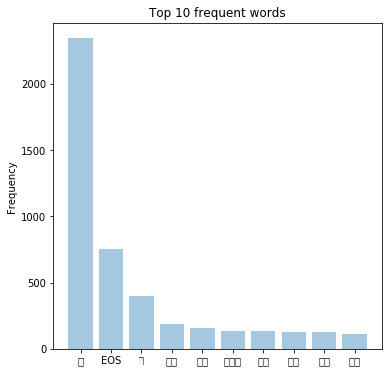

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fig = plt.figure(figsize=(20, 6))

# 37. 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
words = [f[0] for f in frequency[0:10]]
x_pos = np.arange(len(words))

ax1 = fig.add_subplot(131)
ax1.bar(x_pos, [f[1] for f in frequency[0:10]], align='center', alpha=0.4)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(words)
ax1.set_ylabel('Frequency')
ax1.set_title('Top 10 frequent words')

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [34]:
freq = list(dict(frequency).values())
freq.sort(reverse=True)

ax2 = fig.add_subplot(132)
ax2.hist(freq, bins=50, range=(0, 50))
ax2.set_title('Histogram of word count')
ax2.set_xlabel('Word count')
ax2.set_ylabel('Frequency')

/Users/tai-hatake/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Frequency')

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [37]:
rank = list(range(1, len(freq) + 1))

ax3 = fig.add_subplot(133)
ax3.plot(freq, rank)
ax3.set_xlabel('Rank')
ax3.set_ylabel('Frequency')
ax3.set_title('Zipf low')
ax3.set_xscale('log')
ax3.set_yscale('log')

/Users/tai-hatake/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
